# Group Project: Web Scraping Wikipedia

### Author: <font color='red'> Grace Haley </font>

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import urllib.request

from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Demographics_of_Sweden"

page = urllib.request.urlopen(url).read()

parse=BeautifulSoup(page,'lxml')

In [5]:
print(parse.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demographics of Sweden - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

In [6]:
all_tables = parse.find_all('table')

print("Type of all_tables:", type(all_tables))
print("Number of tables found:", len(all_tables))

counter = 1
for table in all_tables:
    print(f"TABLE {counter}: {table}\n")
    counter += 1

Type of all_tables: <class 'bs4.element.ResultSet'>
Number of tables found: 39
TABLE 1: <table class="box-Update plainlinks metadata ambox ambox-content ambox-Update" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/42px-Ambox_current_red_Americas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/63px-Ambox_current_red_Americas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/84px-Ambox_current_red_Americas.svg.png 2x" width="42"/></span></span></div></td><td class="mbox-text"><div class="mbox-text-span">Parts of this article (those related to For example, the current administrative area for the Finnish languages consists of 66 munici

In [7]:
all_sortable_tables = parse.find_all('table', class_='wikitable sortable')


print("Number of sortable tables found:", len(all_sortable_tables))

for table in all_sortable_tables:
    print(f"SORTABLE TABLE: {table}\n")

Number of sortable tables found: 2
SORTABLE TABLE: <table class="wikitable sortable" style="text-align: right;">
<tbody><tr>
<th>
</th>
<th>Average<br/>population (31 december)
</th>
<th>Live births
</th>
<th>Deaths
</th>
<th>Natural<br/>change
</th>
<th>Crude birth rate (per 1000)
</th>
<th>Crude death rate (per 1000)
</th>
<th>Natural change (per 1000)
</th>
<th>Crude migration change (per 1000)
</th>
<th><a class="mw-redirect" href="/wiki/Total_Fertility_Rate" title="Total Fertility Rate">Total<br/>fertility<br/>rates</a><sup class="reference" id="cite_ref-35"><a href="#cite_note-35">[fn 2]</a></sup>
</th></tr>
<tr>
<td>1900
</td>
<td style="text-align:right;">5,136,441 <sup class="reference" id="cite_ref-36"><a href="#cite_note-36">[34]</a></sup>
</td>
<td style="text-align:right;">138,139
</td>
<td style="text-align:right;">86,146
</td>
<td style="text-align:right;">51,993
</td>
<td style="text-align:right;color:blue;">27.0
</td>
<td style="text-align:right;">16.8</td>
<td>10.2
</

In [8]:
right_table = all_sortable_tables[1]
print(f"RIGHT TABLE: {right_table}\n")

RIGHT TABLE: <table class="wikitable sortable">
<tbody><tr>
<th>Year</th>
<th>Total Immigration</th>
<th>Total Emigration</th>
<th>Immigration (Swedes)</th>
<th>Emigration (Swedes)</th>
<th>Net Migration (Swedes)</th>
<th>Total Net Migration
</th></tr>
<tr>
<td>2000</td>
<td>58,659</td>
<td>34,091</td>
<td>13,482</td>
<td>18,256</td>
<td>-4,774</td>
<td>24,568
</td></tr>
<tr>
<td>2001</td>
<td>60,795</td>
<td>32,141</td>
<td>13,797</td>
<td>16,677</td>
<td>-2,880</td>
<td>28,654
</td></tr>
<tr>
<td>2002</td>
<td>64,087</td>
<td>33,009</td>
<td>13,266</td>
<td>15,810</td>
<td>-2,544</td>
<td>31,078
</td></tr>
<tr>
<td>2003</td>
<td>63,795</td>
<td>35,023</td>
<td>12,588</td>
<td>16,317</td>
<td>-3,729</td>
<td>28,772
</td></tr>
<tr>
<td>2004</td>
<td>62,028</td>
<td>36,586</td>
<td>11,467</td>
<td>16,634</td>
<td>-5,167</td>
<td>25,442
</td></tr>
<tr>
<td>2005</td>
<td>65,229</td>
<td>38,118</td>
<td>11,066</td>
<td>17,866</td>
<td>-6,800</td>
<td>27,111
</td></tr>
<tr>
<td>2006</td>
<t

In [9]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]

rows = right_table.find_all('tr')


for row in rows:
    cells = row.find_all('td')
    if len(cells) == 7:
        A.append(cells[0].find(string=True).strip())
        B.append(cells[1].find(string=True).strip())
        C.append(cells[2].find(string=True).strip())
        D.append(cells[3].find(string=True).strip())
        E.append(cells[4].find(string=True).strip())
        F.append(cells[5].find(string=True).strip())
        G.append(cells[6].find(string=True).strip())

In [10]:
import pandas as pd

df = pd.DataFrame({'Year': A})
df['Total Immigration'] = B
df['Total Emigration'] = C
df['Immigration (Swedes)'] = D
df['Emigration (Swedes)'] = E
df['Net Migration (Swedes)'] = F
df['Total Net Migration'] = G
print(df)

    Year Total Immigration Total Emigration Immigration (Swedes)  \
0   2000            58,659           34,091               13,482   
1   2001            60,795           32,141               13,797   
2   2002            64,087           33,009               13,266   
3   2003            63,795           35,023               12,588   
4   2004            62,028           36,586               11,467   
5   2005            65,229           38,118               11,066   
6   2006            95,750           44,908               12,821   
7   2007            99,485           45,418               12,340   
8   2008           101,171           45,294               13,388   
9   2009           102,280           39,240               13,985   
10  2010            98,801           48,853               14,870   
11  2011            96,467           51,179               15,582   
12  2012           103,059           51,747               15,341   
13  2013           115,845           50,715     

In [11]:
df.to_csv('CSC221-webscrape-data.csv')
print("File CSC221-webscrape-data.csv created")

File CSC221-webscrape-data.csv created


In [12]:
# Graph section import
import matplotlib.pyplot as plt

<BarContainer object of 24 artists>

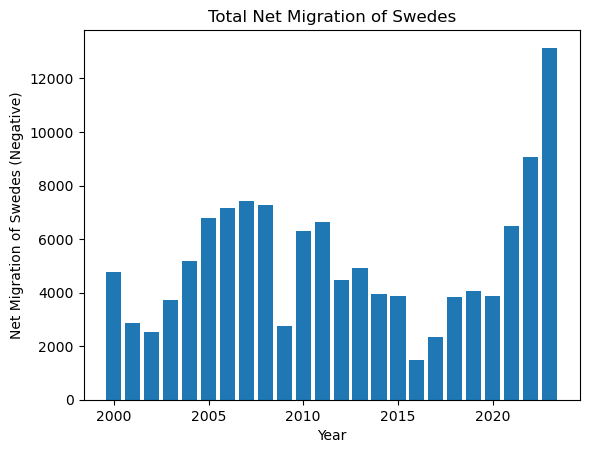

In [13]:
# reading the csv file to a dataframe
with open("CSC221-webscrape-data.csv") as file:
   df = pd.read_csv(file)
x = df["Year"]
y_str = df["Net Migration (Swedes)"]
y = []
for data in y_str:
    y.append(abs(int(data.replace(",", ""))))
plt.title("Total Net Migration of Swedes")
plt.xlabel("Year")
plt.ylabel("Net Migration of Swedes (Negative)")
plt.plot
plt.bar(x, y)